In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from similarity_searching_sketches.caffe_vector_reader import CaffeVectorsIterator
from similarity_searching_sketches.distances import get_sample_distances
from similarity_searching_sketches.persistence import save_np_array
from similarity_searching_sketches.visualization import hist_array

#### Experiment configuration

In [2]:
DATA_FOLDER='/home/matej/data/sketch-testing/dataset_100K/'
CAFFE_VECTORS_PATH='/home/matej/data/sketch-testing/profi-neuralnet-100K.data' #caffe vectors file 
TRAIN_SET_SAVE_PATH=DATA_FOLDER+'train_set.npy' #persist train dataset to
TEST_SET_SAVE_PATH=DATA_FOLDER+'test_set.npy' #persist test dataset to
DATA_SAMPLE_SIZE=10000 #number of samples to read
PORTION_TEST_SET=0.2 #portion of samples in test set
N_DIST_DISTR_REF_OBJ=100 #how many reference objects to use for distance distribution estimation
LOG_BY=1000

#### Read raw data



In [3]:
iterator=CaffeVectorsIterator(CAFFE_VECTORS_PATH, DATA_SAMPLE_SIZE,allow_duplicities=False)

In [4]:
_, decaf_vecs=zip(*list(iterator))
decaf_vecs=np.array(decaf_vecs)

#### Shape of vectors (n_samples, n_features)

In [5]:
decaf_vecs.shape

(10000, 4096)

#### Shuffle vectors

In [6]:
np.random.shuffle(decaf_vecs)

#### Train/test split

In [7]:
training_set, test_set=train_test_split(decaf_vecs,test_size=PORTION_TEST_SET)

In [8]:
training_set.shape

(8000, 4096)

In [9]:
test_set.shape

(2000, 4096)

#### Persist 

In [10]:
save_np_array(TRAIN_SET_SAVE_PATH, training_set)
save_np_array(TEST_SET_SAVE_PATH, test_set)

#### Analysis of distance distribution

In [11]:
distances_l1, distances_l2 = get_sample_distances(vec_matrix=training_set, sample_size=N_DIST_DISTR_REF_OBJ, p=[1,2], log_by=LOG_BY)


INFO:Going to compute distances from selected 100 reference objects to all 7900 other objects in given matrix for p=[1, 2].
INFO:IterationLogger| Started iteration no.: 1000
 Time from previous iteration: 6.0197858810424805s
 Time from start: 6.019786834716797s
INFO:IterationLogger| Started iteration no.: 2000
 Time from previous iteration: 5.9862775802612305s
 Time from start: 12.006065368652344s
INFO:IterationLogger| Started iteration no.: 3000
 Time from previous iteration: 5.506946086883545s
 Time from start: 17.513012409210205s
INFO:IterationLogger| Started iteration no.: 4000
 Time from previous iteration: 5.15048360824585s
 Time from start: 22.66349697113037s
INFO:IterationLogger| Started iteration no.: 5000
 Time from previous iteration: 5.587644577026367s
 Time from start: 28.251142501831055s
INFO:IterationLogger| Started iteration no.: 6000
 Time from previous iteration: 5.416759729385376s
 Time from start: 33.66790318489075s
INFO:IterationLogger| Started iteration no.: 7000


#### Distance distribution Minkowski L1

In [12]:
pd.DataFrame(distances_l1).describe()

,0
count,790000.000000
mean,2576.563802
std,321.223836
min,693.750549
25%,2373.879211
50%,2583.641602
75%,2787.588562
max,4454.577148


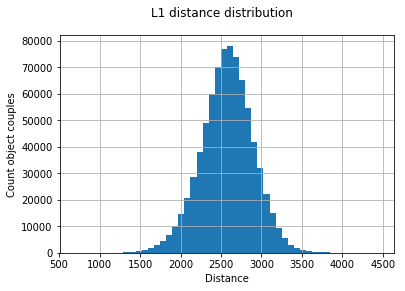

In [13]:
hist_array(distances_l1, bins=50, title='L1 distance distribution', xlabel='Distance', ylabel='Count object couples')

#### Distance distribution Minkowski L2

In [14]:
pd.DataFrame(distances_l2).describe()

,0
count,790000.000000
mean,83.274506
std,10.982581
min,26.673601
25%,75.685234
50%,82.445858
75%,90.249174
max,152.419373


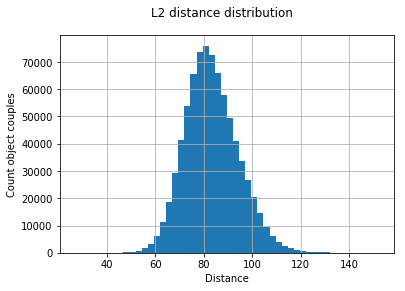

In [15]:
hist_array(distances_l2, bins=50, title='L2 distance distribution', xlabel='Distance', ylabel='Count object couples')